###### 2020-11-02 월요일

# 07_앙상블기법
   - 모델의 예측 성능을 높이기위해 여러가지 기법을 조합하는 앙상블(`ensemble`)방법을 많이 사용한다.
   - 이번시간에는 여러가지 앙상블 방법에 대하여 공부해보자

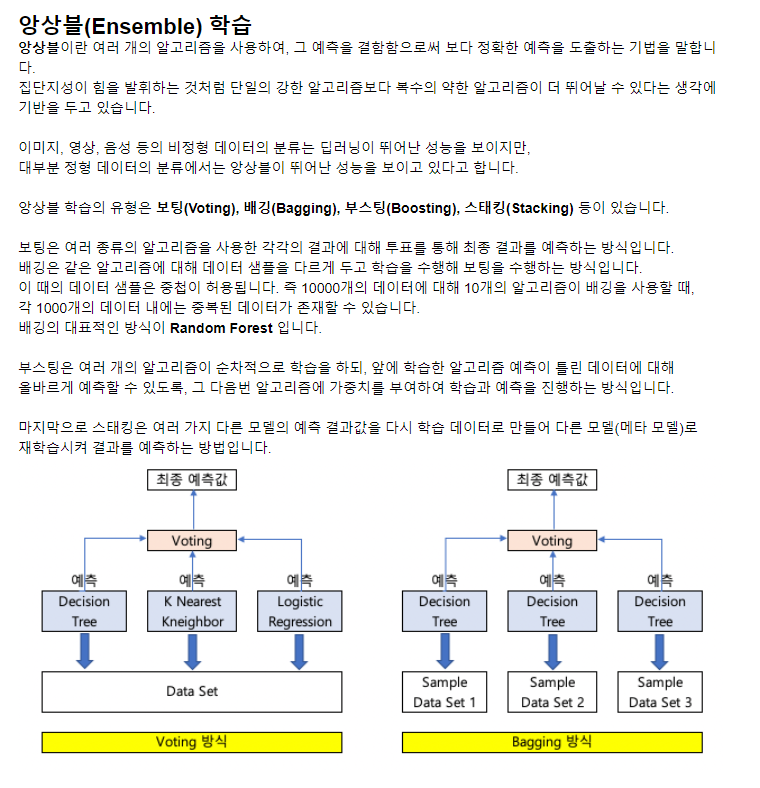

In [9]:
from PIL import Image
Image.open('./실습데이터/ensemble-01.PNG')

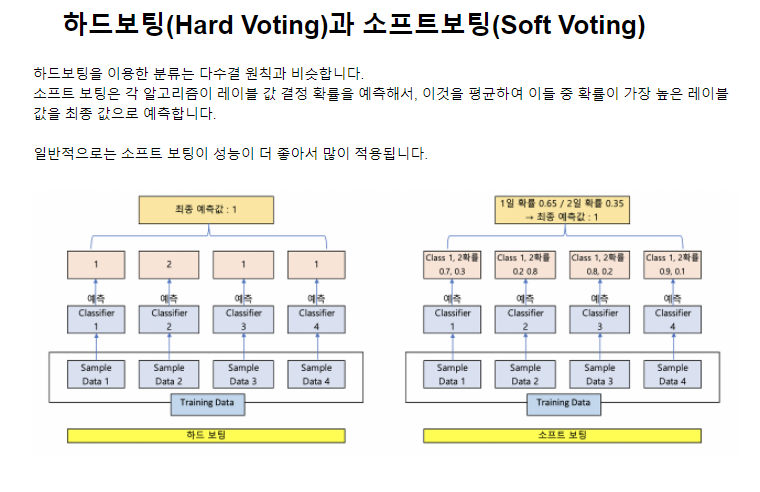

In [10]:
from PIL import Image
Image.open('./실습데이터/ensemble-02.PNG')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# 모델 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 앙상블을 위한 분류 학습기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, make_scorer

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(cancer.data,
                        columns = cancer.feature_names)

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. 소프트 보팅
   - votingClassifier

In [19]:
dtc = DecisionTreeClassifier(random_state=123)
lr = LogisticRegression(random_state=123)
knn = KNeighborsClassifier()


# 보팅을 수행하기 위한 함수 : votingClassifier
voting_model = VotingClassifier([('dtc', dtc), ('lr', lr), ('knn', knn)],
                                voting='soft')

In [21]:
# 보팅을 수행하기 위해 Train / Test 셋 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size = 0.2,
                                                    random_state=123)

In [26]:
# 본격적인 보팅을 진행하기 전에 개별적인 모델의 accuracy를 보자
classifier = [dtc, lr, knn]

for c in classifier:
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    print(c.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.956140350877193
LogisticRegression 0.9824561403508771
KNeighborsClassifier 0.9649122807017544


In [24]:
# 보팅 분류기를 이용해서 학습/예측/평가

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

print('세가지 모델을 보팅한 모델의 accuracy는? : ', accuracy_score(y_test, y_pred))


세가지 모델을 보팅한 모델의 accuracy는? :  0.9912280701754386


## 2. 하드보팅

In [38]:
dtc = DecisionTreeClassifier(random_state=123)
lr = LogisticRegression(random_state=123)
knn = KNeighborsClassifier()


# 보팅을 수행하기 위한 함수 : votingClassifier
voting_model = VotingClassifier([('dtc', dtc), ('lr', lr), ('knn', knn)],
                                voting='hard')

In [39]:
# 보팅을 수행하기 위해 Train / Test 셋 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size = 0.2,
                                                    random_state=123)

In [40]:
# 본격적인 보팅을 진행하기 전에 개별적인 모델의 accuracy를 보자
classifier = [dtc, lr, knn]

for c in classifier:
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    print(c.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.956140350877193
LogisticRegression 0.9824561403508771
KNeighborsClassifier 0.9649122807017544


In [41]:
# 보팅 분류기를 이용해서 학습/예측/평가

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

print('세가지 모델을 보팅한 모델의 accuracy는? : ', accuracy_score(y_test, y_pred))


세가지 모델을 보팅한 모델의 accuracy는? :  0.9824561403508771


## 3. 배깅
   - RandomForest는 배깅을 기반으로 구현된 대표적인 머신러닝 알고리즘이다.
   - 보팅은 분석가가 원하는 여러가지 모델을 선택하여 구현해야한다.
   - 하지만 배깅의 경우 개발자가 구현해 놓은 모델(RandomForest)을 바로 사용하면 된다.
   - 구지` VotingClassifier()`와 같은 함수를 이용해서 모델을 구현할 필요없이 사용하면 된다.

In [34]:
rfc = RandomForestClassifier()


params = {
    'n_estimators'      : [100, 200, 300],
    'max_depth'         : [2, 4, 6],
    'min_samples_split' : [2, 4, 6]
}

gsRFC = GridSearchCV(rfc, param_grid=params, cv=5, scoring='accuracy')

gsRFC.fit(X_train, y_train)
REC_best = gsRFC.best_estimator_

In [37]:
print(REC_best)
print(gsRFC.best_score_)

RandomForestClassifier(max_depth=6, min_samples_split=4)
0.9516483516483516
